# 1.Data Exploration

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import module as md

1- Loading the Dataset

In [53]:
df=pd.read_csv('house-votes-84.csv')

2-viewing the first few rows

In [54]:
df.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,REP,NaN,y,n,y,y,y,n,n,n,y,?,y,y,NaN,n,y
1,Republican,NaN,y,n,y,y,y,n,n,n,n,n,y,y,NaN,n,?
2,DEM,NaN,y,y,?,y,y,n,n,n,n,y,n,y,NaN,n,n
3,DEM,NaN,y,y,n,?,y,n,n,n,n,y,n,y,NaN,n,y
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3-Using .info finction

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Party                                   414 non-null    object 
 1   Handicapped-infants                     25 non-null     float64
 2   Water-project-cost-sharing              414 non-null    object 
 3   Adoption-of-the-budget-resolution       414 non-null    object 
 4   Physician-fee-freeze                    414 non-null    object 
 5   El-salvador-aid                         414 non-null    object 
 6   Religious-groups-in-schools             414 non-null    object 
 7   Anti-satellite-test-ban                 414 non-null    object 
 8   Aid-to-nicaraguan-contras               414 non-null    object 
 9   MX-missile                              414 non-null    object 
 10  Immigration                             414 non-null    object

4-checking for missing values

In [56]:
df.isna().sum()

,0
Party,43
Handicapped-infants,432
Water-project-cost-sharing,43
Adoption-of-the-budget-resolution,43
Physician-fee-freeze,43
El-salvador-aid,43
Religious-groups-in-schools,43
Anti-satellite-test-ban,43
Aid-to-nicaraguan-contras,43
MX-missile,43


# 2. Data Cleaning

1-Handling missing values

In [57]:
nulls=df.columns[df.isna().mean()>0.7]
print(nulls)
df.drop(columns=nulls,inplace=True)

Index(['Handicapped-infants', 'Crime'], dtype='object')


Handling null values using simple imputer

In [58]:
df["Party"].dropna(inplace=True)

In [59]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [60]:
df.isna().sum()

,0
Party,0
Water-project-cost-sharing,0
Adoption-of-the-budget-resolution,0
Physician-fee-freeze,0
El-salvador-aid,0
Religious-groups-in-schools,0
Anti-satellite-test-ban,0
Aid-to-nicaraguan-contras,0
MX-missile,0
Immigration,0


2-Correcting inconsistences

In [61]:
df["Party"]=df["Party"].replace({"Democrat":"DEM","demo":"DEM" , "Republican":"REP" , "repub" :"REP"})

3-Checking for Duplicates

In [62]:
df.duplicated().sum()

169

In [63]:
df_imputed =df.drop_duplicates()

# 3. Data Visualization

1. Ploting the distribution of party

<Axes: xlabel='Party'>

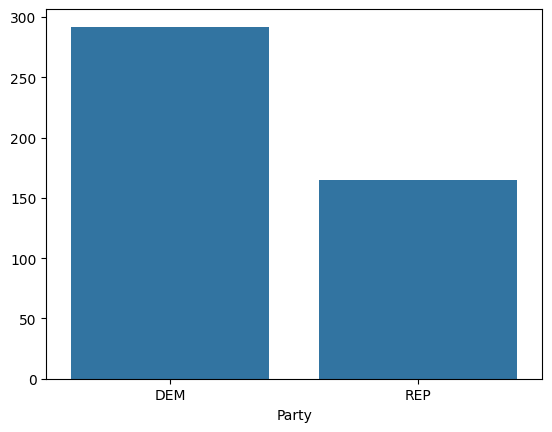

In [64]:
sns.barplot(x=df["Party"].value_counts().index,y=df["Party"].value_counts().values)

In [65]:
px.pie(df,names="Party")

## *distribution of Water-project-cost-sharing*

In [66]:
px.pie(df,names="Water-project-cost-sharing")

distribution of Water-project-cost-sharing with party

In [67]:
px.pie(df,names="Water-project-cost-sharing",color="Party")

as we see its more likely to be a Democrate if you choose No to the Water-project-cost-sharing.

Distribution of Education-spending spending and party

In [68]:
px.pie(df,names="Education-spending",color="Party")

Its more likely if you choose no to Education-spending to be a Democrate

Distribution of Immigration and Party

In [69]:
px.pie(df,names="Immigration",color="Party")

Either you choos yes or no there is no diffrence on Immigration problem you will always be a republican

# 4.Feature Engenering

In [70]:
for i in df.columns:
  if df[i].dtype=="object":
    df[i]=df[i].replace({"y":1,"n":0 , "?": np.nan})

<ipython-input-70-69f071d58459>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [71]:
imputer=SimpleImputer(strategy='most_frequent')
df.iloc[:,1:]=imputer.fit_transform(df.iloc[:,1:])

In [72]:
df["Party"]=df["Party"].replace({"DEM":1,"REP":0})

<ipython-input-72-2c478fd33481>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# 5. Train Test Split

1-Spliting Dataset

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x=df.drop(columns="Party")
y=df["Party"]

Selecting best relation columns with the target using Kbest

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

In [76]:
selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(x, y)

selected_features = x.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Adoption-of-the-budget-resolution', 'Physician-fee-freeze',
       'El-salvador-aid', 'Anti-satellite-test-ban',
       'Aid-to-nicaraguan-contras', 'Education-spending'],
      dtype='object')


In [77]:
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=42,stratify=y)

# 6. Model Building

# 1-Logistic *Regression*

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [79]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Predection on train part

In [80]:
y_pred_train=lr.predict(X_train)

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       132
           1       0.97      0.96      0.97       233

    accuracy                           0.96       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.96      0.96      0.96       365



predection on test part

In [102]:
y_pred_test=lr.predict(X_test)

print(classification_report(y_test,y_pred_test))
lr_score=classification_report(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.98      0.97      0.97        59

    accuracy                           0.97        92
   macro avg       0.96      0.97      0.96        92
weighted avg       0.97      0.97      0.97        92



# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Predection on train set

In [84]:
y_pred_train=rf.predict(X_train)

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       132
           1       0.97      0.98      0.97       233

    accuracy                           0.97       365
   macro avg       0.97      0.96      0.96       365
weighted avg       0.97      0.97      0.97       365



Predecction on test set

In [103]:
y_pred_test_rf=rf.predict(X_test)

print(classification_report(y_test,y_pred_test_rf))
rf_score=classification_report(y_test,y_pred_test_rf)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.95      0.97      0.96        59

    accuracy                           0.95        92
   macro avg       0.94      0.94      0.94        92
weighted avg       0.95      0.95      0.95        92



# SVM

In [86]:
from sklearn.svm import SVC

In [87]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

predection on train set

In [88]:
y_pred_train=svc.predict(X_train)

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       132
           1       0.96      0.98      0.97       233

    accuracy                           0.96       365
   macro avg       0.97      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



Predection on test set

In [106]:
y_pred_test_svc=svc.predict(X_test)

print(classification_report(y_test,y_pred_test_svc))
svc_score=classification_report(y_test,y_pred_test_svc)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.95      0.97      0.96        59

    accuracy                           0.95        92
   macro avg       0.94      0.94      0.94        92
weighted avg       0.95      0.95      0.95        92



# XGBOOST

In [90]:
from xgboost import XGBClassifier

In [91]:
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [92]:
y_pred_train=xg.predict(X_train)

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       132
           1       0.97      0.98      0.97       233

    accuracy                           0.97       365
   macro avg       0.97      0.96      0.96       365
weighted avg       0.97      0.97      0.97       365



In [105]:
y_pred_test_xg=xg.predict(X_test)

print(classification_report(y_test,y_pred_test_xg))
xg_score=classification_report(y_test,y_pred_test_xg)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.95      0.97      0.96        59

    accuracy                           0.95        92
   macro avg       0.94      0.94      0.94        92
weighted avg       0.95      0.95      0.95        92



# Overview of every model and its accuracy

In [115]:
models = {
    "XGBoost": y_pred_test_xg,
    "SVC": y_pred_test_svc,
    "Random Forest": y_pred_test_rf,
    "Logistic Regression": y_pred_test
}

results = []

for model_name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)


    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']


    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score
    })
df_results = pd.DataFrame(results)

df_results = df_results.sort_values(by="Accuracy", ascending=False)

In [116]:
df_results

,Model,Accuracy,Precision,Recall,F1 Score
3,Logistic Regression,0.967391,0.967843,0.967391,0.967495
0,XGBoost,0.945652,0.945516,0.945652,0.945462
1,SVC,0.945652,0.945516,0.945652,0.945462
2,Random Forest,0.945652,0.945516,0.945652,0.945462


as we see Logistic refression have acchived the highest accuracy among the rest of the models wit acc of 96%

# Conclusion

1. Most Influential Voting Patterns for Predicting Political Affiliation
Using feature importance techniques, the most distinguishing votes will likely be:

Physician-fee-freeze
El-salvador-aid
Education-spending
MX-missile These votes tend to show strong party-line differences.


2. Handling Dataset Challenges
Dealing with Missing Values:

Columns with excessive missing values (like Crime) have been removed.

Encoding Categorical Data:

Convert "y" to 1 and "n" to 0.
Convert "?" values into NaN and by using simple imputer we handeled this values



3. model Performance:

1 -> Logistic regression -> acc = 96%
2 -> Xgboost ,SVC , Random Forest -> acc=94%

Logistic Regression performed best, indicating that the data is well-suited for a linear decision boundary.

i havent done any advanced techniques as all of the models performed well without over fitting or under fitting and i think it gave us high accuracy as i have done good data cleaning and feature engenering and using Kbest to select the highest relation columns with the target helped me alot.
